# **Real Time CV Facial Detection (Haar Cascade)**
https://www.datacamp.com/tutorial/face-detection-python-opencv

---

In [15]:
import cv2


imagePath = '../data/realtime.png'
img = cv2.imread(imagePath)
print(img.shape)

(1926, 3440, 3)


In [16]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image.shape

(1926, 3440)

In [17]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [24]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [19]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

In [20]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 3439.5, 1925.5, -0.5)

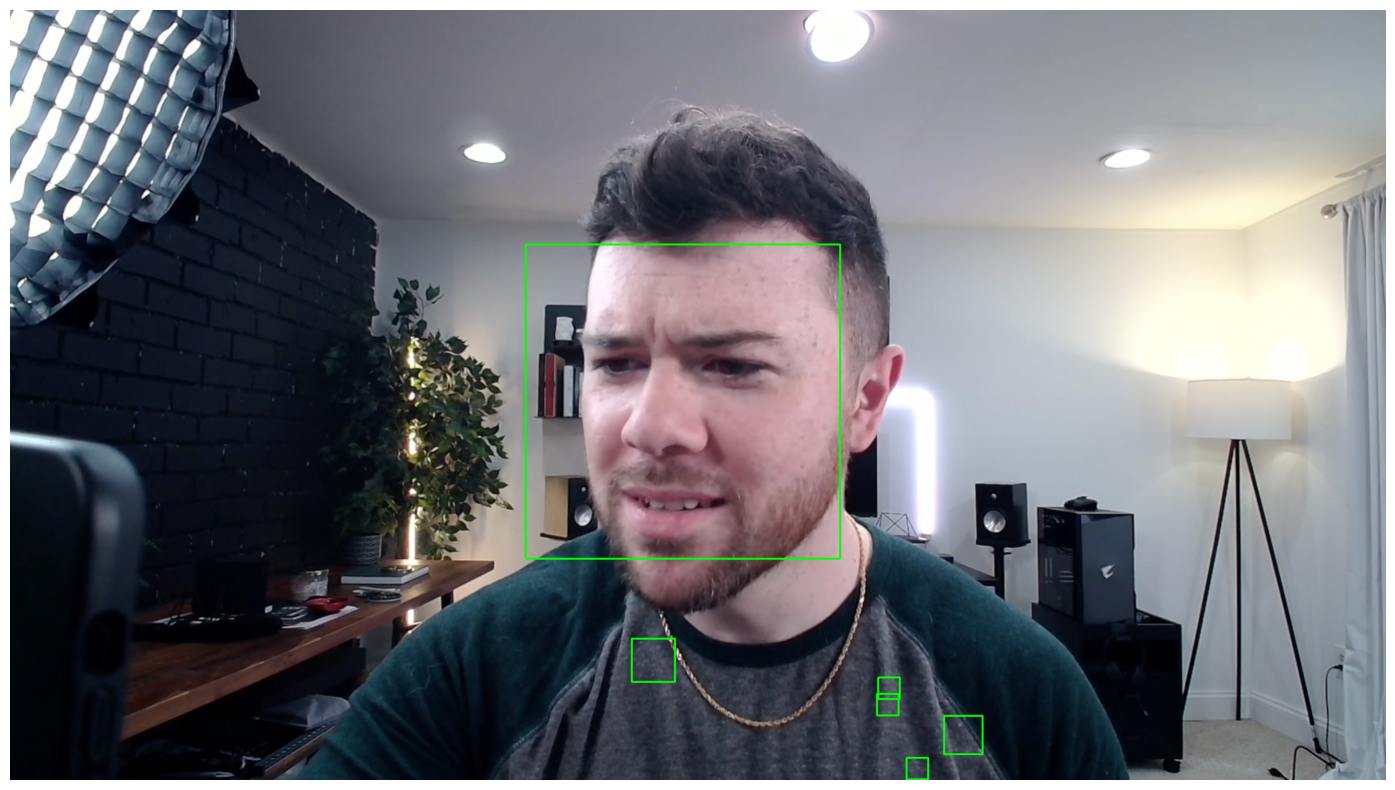

In [25]:
import matplotlib.pyplot as plt



plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

In [28]:
video_capture = cv2.VideoCapture(0)

In [27]:
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

In [29]:
while True:

    result, video_frame = video_capture.read()  # read frames from the video
    if result is False:
        break  # terminate the loop if the frame is not read successfully

    faces = detect_bounding_box(
        video_frame
    )  # apply the function we created to the video frame

    cv2.imshow(
        "My Face Detection Project", video_frame
    )  # display the processed frame in a window named "My Face Detection Project"

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

: 

In [1]:
import cv2

# Start video capture from the first webcam device
video_capture = cv2.VideoCapture(0)
if not video_capture.isOpened():
    print("Error: Could not open video device.")
    exit()

In [2]:
video_capture.release()
cv2.destroyAllWindows()

In [1]:
from transformers import ViTForImageClassification, ViTFeatureExtractor

# import our fine-tuned model from a local checkpoint
latest_checkpoint = 'checkpoint-1000'
model_finetuned = ViTForImageClassification.from_pretrained(latest_checkpoint)
# import features from the same checkpoint
feature_extractor_finetuned = ViTFeatureExtractor.from_pretrained(latest_checkpoint)
# turn evaluation mode on
model_finetuned.eval()

: 

In [ ]:
# Load pre-trained Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    if not ret:
        break  # Break the loop if no frame is captured

    # Convert the image to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Process each face found
    for (x, y, w, h) in faces:
        # Extract face ROI (Region of Interest)
        face_roi = frame[y:y+h, x:x+w]

        # Preprocess the face ROI as per your model requirements
        preprocessed_face_roi = feature_extractor_finetuned(face_roi, return_tensors="pt")

        # Predict using your model
        prediction = model_finetuned(**preprocessed_face_roi)

        # Display the results
        # Example: Draw a rectangle around the face and display the prediction
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, str(prediction), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()